In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Flatten, GlobalAveragePooling2D, Dense, Normalization, BatchNormalization, Dropout, LeakyReLU, ELU, Lambda
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import EfficientNetB3, efficientnet_v2
from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import RMSprop, Adam, SGD, Adagrad, Adadelta
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.metrics import AUC

dataset_folder = "/content/drive/MyDrive/Agricultural-crops"

image_paths = []
labels = []
classes = os.listdir(dataset_folder)
n_classes = len(classes)
for c in classes:
    class_folder = dataset_folder + "/" + c
    for image in os.listdir(class_folder):
        image_path = class_folder + "/" + image
        image_paths.append(image_path)
        labels.append(c)

df = pd.DataFrame({"image_path": image_paths, "label": labels})

train_df, val_df = train_test_split(df, test_size=0.30, stratify=df["label"], random_state=666)

datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=(0.8, 1.2),
    shear_range=0.1,
    channel_shift_range=0.1
)

ts = 150 ;

train_generator = datagen.flow_from_dataframe(
    train_df,
    x_col="image_path",
    y_col="label",
    target_size=(ts, ts),
    class_mode="categorical",
    shuffle=False
)

val_generator = datagen.flow_from_dataframe(
    val_df,
    x_col="image_path",
    y_col="label",
    target_size=(ts, ts),
    class_mode="categorical",
    shuffle=False
)


Found 580 validated image filenames belonging to 30 classes.
Found 249 validated image filenames belonging to 30 classes.


In [ ]:
train_generator

In [ ]:
import matplotlib.pyplot as plt
import time

model_1 = keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(30, activation='softmax')
])

model_1.compile(optimizer = "Adam", loss='categorical_crossentropy', metrics = ["accuracy"])
inicio = time.time()
history_1 = model_1.fit(train_generator, epochs=20, validation_data=val_generator, callbacks=[])
# Grava o tempo final
fim = time.time()

# Calcula o tempo total decorrido
tempo_total = fim - inicio
print(f"Tempo de execução: {tempo_total} segundos")

Epoch 1/20
19/19 [==============================] - 79s 4s/step - loss: 183.6012 - accuracy: 0.0500 - val_loss: 3.3945 - val_accuracy: 0.0723
Epoch 2/20
19/19 [==============================] - 74s 4s/step - loss: 3.3948 - accuracy: 0.0552 - val_loss: 3.3495 - val_accuracy: 0.0884
Epoch 3/20
19/19 [==============================] - 72s 4s/step - loss: 3.4018 - accuracy: 0.0672 - val_loss: 3.3990 - val_accuracy: 0.0442
Epoch 4/20
19/19 [==============================] - 74s 4s/step - loss: 3.3918 - accuracy: 0.0552 - val_loss: 3.3934 - val_accuracy: 0.0522
Epoch 5/20
19/19 [==============================] - 74s 4s/step - loss: 3.3848 - accuracy: 0.0690 - val_loss: 3.3724 - val_accuracy: 0.0683
Epoch 6/20
19/19 [==============================] - 74s 4s/step - loss: 3.3706 - accuracy: 0.0672 - val_loss: 3.3710 - val_accuracy: 0.0803
Epoch 7/20
19/19 [==============================] - 73s 4s/step - loss: 3.3898 - accuracy: 0.0466 - val_loss: 3.4095 - val_accuracy: 0.0522
Epoch 8/20
19/19 [

Train AUC: 3.37
Validation AUC: 3.38


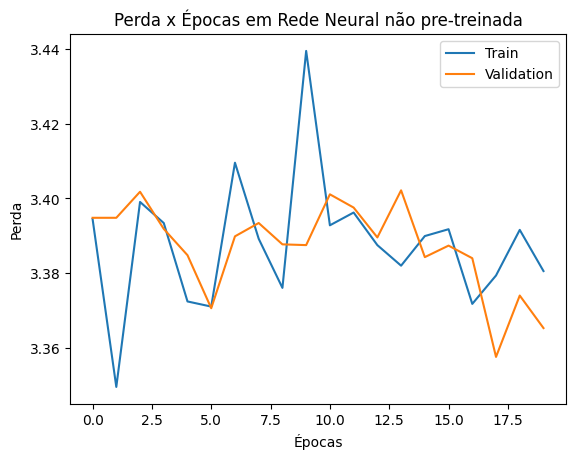

In [ ]:



history_1.history['loss'][0]=history_1.history['loss'][1]


print('Train AUC: {:.2f}'.format(history_1.history['loss'][-1]))
print('Validation AUC: {:.2f}'.format(history_1.history['val_loss'][-1]))

print(history_1)
plt.plot(history_1.history['val_loss'])
plt.plot(history_1.history['loss'])
plt.title('Perda x Épocas em Rede Neural não pre-treinada')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.savefig('plot_salvato.png')
plt.show()

Key: loss, Value: [3.3947947025299072, 3.3947947025299072, 3.401768684387207, 3.391818046569824, 3.384775400161743, 3.370579242706299, 3.38982892036438, 3.3933980464935303, 3.387681722640991, 3.3874807357788086, 3.4010796546936035, 3.397533893585205, 3.3895363807678223, 3.4021496772766113, 3.384262800216675, 3.3873450756073, 3.3839685916900635, 3.3575406074523926, 3.3739736080169678, 3.3652596473693848]
Key: accuracy, Value: [0.05000000074505806, 0.05517241358757019, 0.0672413781285286, 0.05517241358757019, 0.06896551698446274, 0.0672413781285286, 0.046551723033189774, 0.0517241396009922, 0.05000000074505806, 0.05000000074505806, 0.04827586188912392, 0.04827586188912392, 0.05344827473163605, 0.056896552443504333, 0.05000000074505806, 0.05000000074505806, 0.05000000074505806, 0.062068965286016464, 0.05862069129943848, 0.056896552443504333]
Key: val_loss, Value: [3.394490957260132, 3.3495028018951416, 3.399038314819336, 3.393385171890259, 3.3723907470703125, 3.371018648147583, 3.40954566

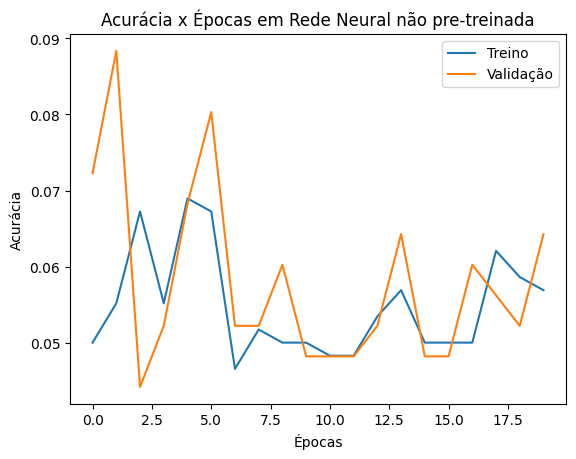

In [ ]:
for key, value in (history_1.history.items()):
    print(f'Key: {key}, Value: {value}')
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Acurácia x Épocas em Rede Neural não pre-treinada')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend(['Treino', 'Validação'], loc='upper right')
plt.show()

In [ ]:
from tensorflow.keras.applications import VGG16

pre_trained_model = VGG16(include_top=False, weights='imagenet', input_shape=(150, 150, 3))
for layer in pre_trained_model.layers:
    layer.trainable = False

last_output = pre_trained_model.output

from tensorflow.keras import Model

def transfer_learning(last_output, pre_trained_model):
    x = tf.keras.layers.Flatten()(last_output)
    x = tf.keras.layers.Dense(1024, activation='relu')(x)
    x = tf.keras.layers.Dropout(0.3)(x)
    x = tf.keras.layers.Dense(30, activation='softmax')(x)
    model = Model(inputs=pre_trained_model.input, outputs=x)
    return model

model_2 = transfer_learning(last_output, pre_trained_model)

model_2.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.8):
            print("\nReached 80% accuracy so cancelling training!")
            self.model.stop_training = True
callbacks = myCallback()
inicio = time.time()

history_2 = model_2.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,
    callbacks=callbacks
)
fim = time.time()

# Calcula o tempo total decorrido
tempo_total = fim - inicio
print(f"Tempo de execução: {tempo_total} segundos")

58889256/58889256 [==============================] - 2s 0us/step
Epoch 1/20
19/19 [==============================] - 244s 13s/step - loss: 44.7547 - accuracy: 0.1086 - val_loss: 22.2185 - val_accuracy: 0.2450
Epoch 2/20
19/19 [==============================] - 251s 13s/step - loss: 13.2454 - accuracy: 0.3517 - val_loss: 10.0928 - val_accuracy: 0.3092
Epoch 3/20
19/19 [==============================] - 248s 13s/step - loss: 6.5343 - accuracy: 0.4121 - val_loss: 6.4463 - val_accuracy: 0.3414
Epoch 4/20
19/19 [==============================] - 250s 13s/step - loss: 3.5410 - accuracy: 0.5121 - val_loss: 4.4776 - val_accuracy: 0.3133
Epoch 5/20
19/19 [==============================] - 250s 13s/step - loss: 2.2737 - accuracy: 0.5414 - val_loss: 4.2625 - val_accuracy: 0.3534
Epoch 6/20
19/19 [==============================] - 250s 13s/step - loss: 1.9954 - accuracy: 0.5586 - val_loss: 3.5303 - val_accuracy: 0.3614
Epoch 7/20
19/19 [==============================] - 251s 14s/step - loss: 1.949

In [ ]:
print('Train AUC: {:.2f}'.format(history_2.history['loss'][-1]))
print('Validation AUC: {:.2f}'.format(history_2.history['val_loss'][-1]))

plt.plot(history_2.history['val_loss'])
plt.plot(history_2.history['loss'])
plt.title('Perda x Épocas em Rede Neural pre-treinada VGG16')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend(['Treino', 'Validação'], loc='upper right')
plt.savefig('plot_salvato.png')
plt.show()

In [ ]:

plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('Acurácia x Épocas em Rede Neural pre-treinada VGG16')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend(['Treino', 'Validação'], loc='upper right')
plt.show()

In [ ]:
from tensorflow.keras.applications import VGG16

pre_trained_model = VGG16(include_top=False, weights='imagenet', input_shape=(150, 150, 3))
for layer in pre_trained_model.layers:
    layer.trainable = False

last_output = pre_trained_model.output

from tensorflow.keras import Model

def transfer_learning(last_output, pre_trained_model):
    x = tf.keras.layers.Flatten()(last_output)
    x = tf.keras.layers.Dense(1024, activation='relu')(x)
    x = tf.keras.layers.Dropout(0.3)(x)
    x = tf.keras.layers.Dense(30, activation='softmax')(x)
    model = Model(inputs=pre_trained_model.input, outputs=x)
    return model

model_2 = transfer_learning(last_output, pre_trained_model)

model_2.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.8):
            print("\nalcançou 80% de acerto!")
            self.model.stop_training = True
callbacks = myCallback()

history_2 = model_2.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,
    callbacks=callbacks
)